In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
# читаю файл с данными
students = pd.read_csv('stud_math.xls')

In [3]:
# просматриваю данные
display(students)

In [4]:
# функция для переименовывания столбцов
def rename_columns(df, old_name, new_name):
    df.rename(columns={old_name: new_name}, inplace=True)


# переименовываю столбцы датасета для наглядности
rename_columns(students, 'Pstatus', 'parents_status')
rename_columns(students, 'Medu', 'mother_education')
rename_columns(students, 'Fedu', 'father_education')
rename_columns(students, 'Mjob', 'mother_job')
rename_columns(students, 'Fjob', 'father_job')
rename_columns(students, 'famsize', 'family_size')
rename_columns(students, 'traveltime ', 'travel_time')
rename_columns(students, 'studytime ', 'study_time')
rename_columns(students, 'schoolsup ', 'school_support')
rename_columns(students, 'famsup', 'family_support')
rename_columns(students, 'paid', 'add_paid_lessons')
rename_columns(students, 'activities', 'add_activites')
rename_columns(students, 'famrel', 'family_relations')
rename_columns(students, 'freetime', 'free_time')
rename_columns(students, 'goout', 'go_out')
rename_columns(students, 'Fjob', 'father_job')
rename_columns(students, 'Fjob', 'father_job')

In [5]:
# функция определяет процент указанных значений в столбце от общего количества значений
def persent_found(df, column, value):
    return round(df[column].value_counts()[value] * 100 / df[column].count(), 2)

In [6]:
# Функция ищет сколько всего уникальных значений в столбце и сколько значений встречается больше 10 раз.
def number_count(students, column_name):
    number = len(students[column_name].value_counts())
    number10 = (students[column_name].value_counts() > 10).sum()
    print('Всего {} возможных значений. Больше 10 раз встречются {} значений'.format(
        number, number10))

In [7]:
# имена и описание номинативных признаков
nominativ_dic = {'school': 'аббревиатура школы, в которой учится ученик',
                 'sex': "пол ученика ('F' - женский, 'M' - мужской)",
                 'address': "тип адреса ученика ('U' - городской, 'R' - за городом)",
                 'family_size': "размер семьи('LE3' <= 3, 'GT3' >3)",
                 'parents_status': " статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)",
                 'mother_education': "образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)",
                 'father_education': "образование отца   (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)",
                 'mother_job': "работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)",
                 'father_job': "работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)",
                 'reason': "причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)",
                 'guardian': "опекун ('mother' - мать, 'father' - отец, 'other' - другое)",
                 'traveltime': "время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)",
                 'studytime': "время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)",
                 'failures': " количество внеучебных неудач (n, если 1<=n<=3, иначе 0)",
                 'schoolsup': "дополнительная образовательная поддержка (yes или no)",
                 'family_support': "семейная образовательная поддержка (yes или no)",
                 'add_paid_lessons': "дополнительные платные занятия по математике (yes или no)",
                 'add_activites': "дополнительные внеучебные занятия (yes или no)",
                 'nursery': "посещал детский сад (yes или no)",
                 'higher': "хочет получить высшее образование (yes или no)",
                 'internet': "наличие интернета дома (yes или no)",
                 'romantic': "в романтических отношениях (yes или no)",
                 'family_relations': "семейные отношения (от 1 - очень плохо до 5 - очень хорошо)",
                 'free_time': "свободное время после школы (от 1 - очень мало до 5 - очень мого)",
                 'go_out': "проведение времени с друзьями (от 1 - очень мало до 5 - очень много)",
                 'health': "текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)",
                 }

In [8]:
# удаляю столбец 'studytime, granular' так как отсутствует его описание
students.drop(['studytime, granular'], inplace=True, axis=1)

In [9]:
# удаляю строки со значенями 'score' == NaN
students.dropna(subset=['score'], inplace=True, axis='index')

In [10]:
students.info()

In [11]:
students.columns

<h2>Цели и задачи проекта</h2>


<b>Описание:</b>
Для составления модели по отслеживанию влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, необходимо провести разведывательных анализ данных для определения значимых параметров для построения модели.

<b>Задачи:</b>
Необходимо провести очистку данных и найти значимые параметры для дальнейшего их использования.

<b>Цели:</b>
Получить опыт в первом самостоятельном разведывательном анализе данных.

<h2>Рассматриваю нечисловые признаки:</h2>

Рассматриваю каждый признак в отдельности. 

<h3>1. school</h3>аббревиатура школы, в которой учится ученик

In [41]:
students.school.value_counts()

GP    344
MS     45
Name: school, dtype: int64

Признак заполнен полностью. Всего два возможных значения.  

In [42]:
persent_GP = persent_found(students, 'school', 'GP')
persent_MS = persent_found(students, 'school', 'MS')
print('в школе GP учится {}% учеников, в школе MS {}%'.format(
    round(persent_GP, 2), round(persent_MS, 2)))

в школе GP учится 88.43% учеников, в школе MS 11.57%


<h3>2. sex</h3>пол ученика

In [43]:
students.sex.value_counts()

F    204
M    185
Name: sex, dtype: int64

Признак заполнен полностью. Всего два возможных значения.

In [44]:
students.groupby(['sex']).score.mean()

sex
F    50.098039
M    54.648649
Name: score, dtype: float64

У мальчиков средний бал ненамного выше.

<h3>3. address</h3> тип адреса ученика ('U' - городской, 'R' - за городом)

In [45]:
students.address.value_counts()

U    291
R     83
Name: address, dtype: int64

In [46]:
persent_U = persent_found(students, 'address', 'U')
persent_R = persent_found(students, 'address', 'R')
print('{}% учеников живет в городе, {}% живут за городом'.format(
    round(persent_U, 2), round(persent_R, 2)))

77.81% учеников живет в городе, 22.19% живут за городом


In [47]:
students.groupby(['address']).score.mean()

address
R    46.927711
U    53.573883
Name: score, dtype: float64

У городских учеников средний бал выше чем у тех кто живет за городом.

<h3>3. family_size</h3> размер семьи('LE3' <= 3, 'GT3' >3)

In [48]:
students.family_size.value_counts()

GT3    255
LE3    107
Name: family_size, dtype: int64

In [49]:
persent_GT3 = persent_found(students, 'family_size', 'GT3')
persent_LE3 = persent_found(students, 'family_size', 'LE3')
print('{}% учеников семья больше 3 человек, у {}% в семье 3 или мень человек'.format(
    round(persent_GT3, 2), round(persent_LE3, 2)))

70.44% учеников семья больше 3 человек, у 29.56% в семье 3 или мень человек


In [50]:
students.groupby(['family_size']).score.mean()

family_size
GT3    51.509804
LE3    54.672897
Name: score, dtype: float64

Средние баллы у учеников из больших и небольших семей примерно равны.

<h3>4. parents_status </h3> статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [51]:
persent_T = persent_found(students, 'parents_status', 'T')
persent_A = persent_found(students, 'parents_status', 'A')
print('у {}% учеников родители проживают совместно, у {}% раздельно'.format(
    round(persent_T, 2), round(persent_A, 2)))

у 89.53% учеников родители проживают совместно, у 10.47% раздельно


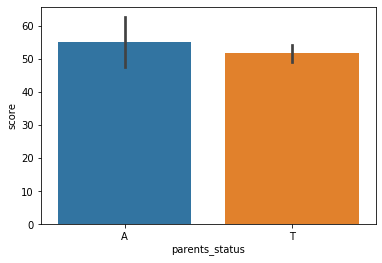

In [52]:
sns.barplot(x='parents_status', y='score', data=students)

Средние баллы у учеников у которых родители проживают совместно незначительно больше чем у тех у кого проживают отдельно.

<h3>5. mother_education </h3> образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [53]:
students.mother_education.value_counts()

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: mother_education, dtype: int64

In [54]:
(students.mother_education.value_counts() > 10).sum()

4

Всего 5 возможных значений. Больше 10 раз встречаются 4 значения. Но

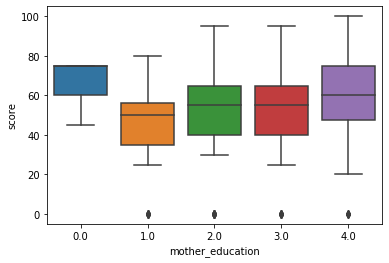

In [55]:
sns.boxplot(x='mother_education', y='score', data=students)

Из графиков видно, что с увеличением образования матери средний балл увеличивается. И только при отсутствии образования есть аномально высокое значение оценок.

<h3>6. father_education </h3> образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [56]:
students.father_education.value_counts()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: father_education, dtype: int64

In [57]:
(students.father_education.value_counts() > 10).sum()

4

Всего 5 возможных значений. Больше 10 раз встречаются 4 значения. Еще одно значение = 40. Скорее всего это опечатка - хотели написать 4. Исправляю:

In [58]:
students.father_education = students.father_education.apply(
    lambda x: 4.0 if x == 40 else x)

In [59]:
students.father_education.value_counts()

2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: father_education, dtype: int64

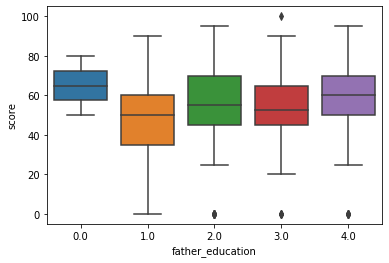

In [60]:
sns.boxplot(x='father_education', y='score', data=students)

Из графиков видно, что с увеличением образования отца средний балл увеличивается. И опять, при отсутствии образования есть аномально высокое значение оценок (скорее всего из-за небольшой выборки).

<h3>7. mother_job </h3> работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [61]:
students.mother_job.value_counts()

other       127
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

Всего 5 возможных значений. Больше 10 раз встречаются все значения.

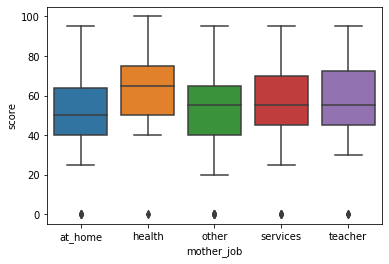

In [62]:
sns.boxplot(x='mother_job', y='score', data=students)

Из графиков видно, что есть небольшая зависимость среднего бала от профессии. Наибольшие значения у учеников чьи матери работают в здравоохранении.

<h3>8. father_job </h3> работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [63]:
students.father_job.value_counts()

other       194
services     99
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

Всего 5 возможных значений. Больше 10 раз встречаются все значения.

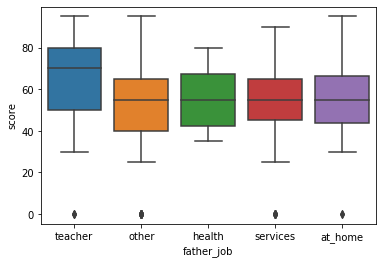

In [64]:
sns.boxplot(x='father_job', y='score', data=students)

Из графиков видно, что от профессии отка средний балл учеников практически не зависит. Единственное исключение это профессия учителя.

<h3>9. reason </h3> причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [65]:
students.reason.value_counts()

course        135
reputation    102
home          101
other          34
Name: reason, dtype: int64

Всего 4 возможных значений. Больше 10 раз встречаются все значения.

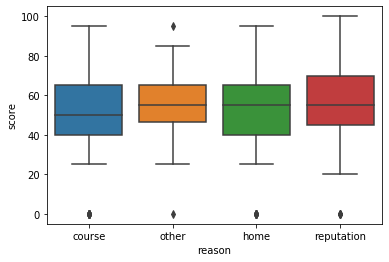

In [66]:
sns.boxplot(x='reason', y='score', data=students)

Из графиков видно, что практически нет зависимости между причиной выбора школы и оценками. Немного выше средний балл у тех учеников, которые выбирали школу из-за репутации.

<h3>10. guardian </h3> опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [67]:
students.guardian.value_counts()

mother    248
father     86
other      24
Name: guardian, dtype: int64

Всего 3 возможных значений. Больше 10 раз встречаются все значения.

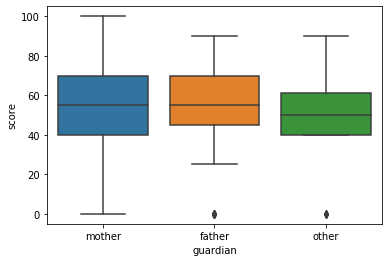

In [68]:
sns.boxplot(x='guardian', y='score', data=students)

Из графиков видно, что практически нет зависимости между оценками учеников и типом опекунства.

<h3>11. traveltime </h3> время в пути до школы (1 - меньше 15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - больше 60 мин.)

In [69]:
students.traveltime.value_counts()

1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

Всего 4 возможных значений. Больше 10 раз встречаются 3 значения.

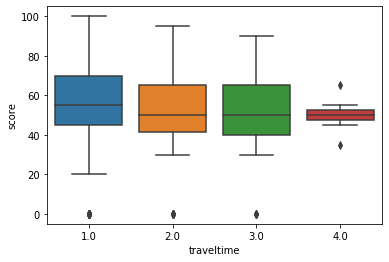

In [70]:
sns.boxplot(x='traveltime', y='score', data=students)

Из графиков видно, что оценки практически не зависят от времени затраченного на дорогу в школу (незначительно болше значения для самой короткой дороги). У четвертого фонарика небольшая выборка (меньше 10 значений)

<h3>12. studytime </h3> время на учёбу помимо школы в неделю (1 - меньше 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - больше 10 часов)

In [71]:
students.studytime.value_counts()

2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

Всего 4 возможных значений. Больше 10 раз встречаются все значения.

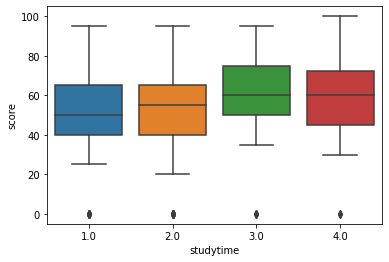

In [72]:
sns.boxplot(x='studytime', y='score', data=students)

Из графиков видно, что средний балл учеников зависит то того больше 3 часов в неделю занимается ученик или меньше. И практически не зависит от того больше или меньше 2-х и 10-ти часов занимается ученик.

<h3>13. failures </h3> количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [73]:
students.failures.value_counts()

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

Всего 4 возможных значений. Больше 10 раз встречаются все значения.

Непонятный параметр. Что означают неудачи - неясно. И, кроме того, отсутствие неудач приравнено к любому количеству неудач больше 3.

In [74]:
# Функция ищет сколько всего уникальных значений в столбце и сколько значений встречается больше 10 раз.
def number_count(students, column_name):
    number = len(students[column_name].value_counts())
    number10 = (students[column_name].value_counts() > 10).sum()
    print('Всего {} возможных значений. Больше 10 раз встречются {} значений'.format(
        number, number10))

<h3>14. schoolsup </h3> дополнительная образовательная поддержка (yes или no)

In [75]:
column_name = 'schoolsup'

In [76]:
students[column_name].value_counts()

no     331
yes     49
Name: schoolsup, dtype: int64

In [77]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


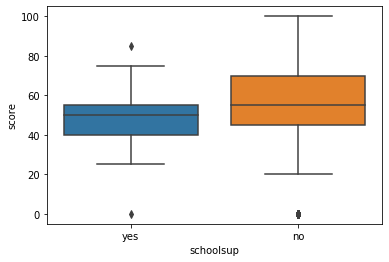

In [78]:
sns.boxplot(x=column_name, y='score', data=students)

Как ни странно, но средние оценки учеников с дополнительной образовательной поддержкой ниже чем у учеников без неё.

<h3>15. family_support </h3> "семейная образовательная поддержка (yes или no)"

In [79]:
column_name = 'family_support'

In [80]:
students[column_name].value_counts()

yes    216
no     135
Name: family_support, dtype: int64

In [81]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


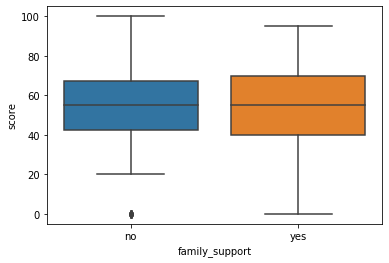

In [82]:
sns.boxplot(x=column_name, y='score', data=students)

Средние оценки учеников не зависят от поддержки семьи.

<h3>16. add_paid_lessons </h3> дополнительные платные занятия по математике (yes или no)

In [83]:
column_name = 'add_paid_lessons'

In [84]:
students[column_name].value_counts()

no     197
yes    153
Name: add_paid_lessons, dtype: int64

In [85]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


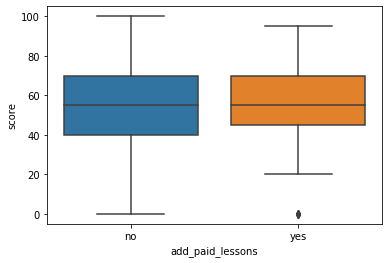

In [86]:
sns.boxplot(x=column_name, y='score', data=students)

Дополнительные занятия по математики помогают поднять нижнюю границу оценок (скорее всего из-за того что дополнительные занятия нужнее тем, кто плохо успевает по предмету), но среднее значение не меняется.

<h3>17. nursery </h3> посещал детский сад (yes или no)

In [87]:
column_name = 'nursery'

In [88]:
students[column_name].value_counts()

yes    297
no      77
Name: nursery, dtype: int64

In [89]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


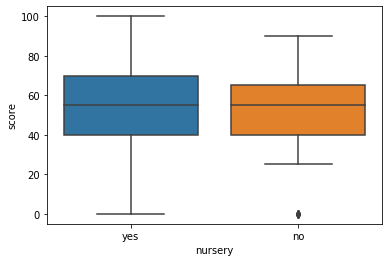

In [90]:
sns.boxplot(x=column_name, y='score', data=students)

Факт посещения детского сада практически не влияет на оценки.

<h3>18. higher </h3> хочет получить высшее образование (yes или no)

In [91]:
column_name = 'higher'

In [92]:
students[column_name].value_counts()

yes    350
no      19
Name: higher, dtype: int64

In [93]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


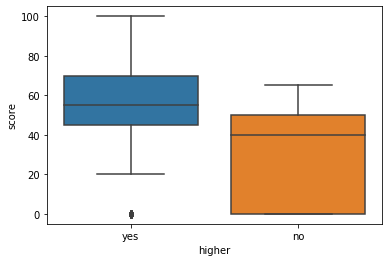

In [94]:
sns.boxplot(x=column_name, y='score', data=students)

Желание получать высшее образование тесто связано со средним баллом.

<h3>19. internet </h3> наличие интернета дома (yes или no)

In [95]:
column_name = 'internet'

In [96]:
students[column_name].value_counts()

yes    300
no      55
Name: internet, dtype: int64

In [97]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


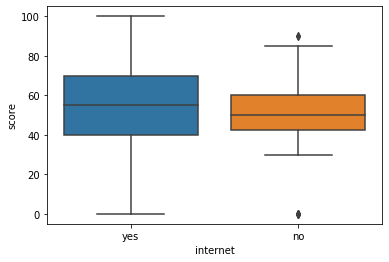

In [98]:
sns.boxplot(x=column_name, y='score', data=students)

Наличие интернета практически не влияет на оценки

<h3>20. romantic </h3> в романтических отношениях (yes или no)

In [99]:
column_name = 'romantic'

In [100]:
students[column_name].value_counts()

no     235
yes    123
Name: romantic, dtype: int64

In [101]:
number_count(students, column_name)

Всего 2 возможных значений. Больше 10 раз встречются 2 значений


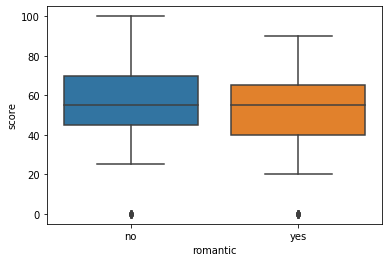

In [102]:
sns.boxplot(x=column_name, y='score', data=students)

Отсутствие роматических отношений у учеников блакотворно влияет на знания.

<h3>21. family_relations </h3> семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [103]:
column_name = 'family_relations'

In [104]:
students[column_name].value_counts()

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relations, dtype: int64

In [105]:
number_count(students, column_name)

Всего 6 возможных значений. Больше 10 раз встречются 4 значений


Значение "-1.0" скорее всего опечатка от '1.0'.

In [106]:
students[column_name] = students[column_name].apply(
    lambda x: 1.0 if x == -1.0 else x)

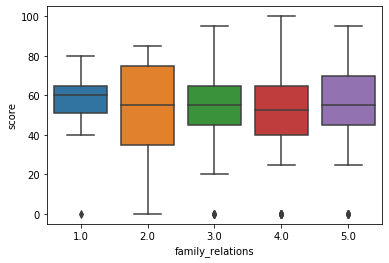

In [107]:
sns.boxplot(x=column_name, y='score', data=students)

Нет связи между отношениями в семье и баллами ученика.

<h3>22. free_time </h3> свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [108]:
column_name = 'free_time'

In [109]:
students[column_name].value_counts()

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
Name: free_time, dtype: int64

In [110]:
number_count(students, column_name)

Всего 5 возможных значений. Больше 10 раз встречются 5 значений


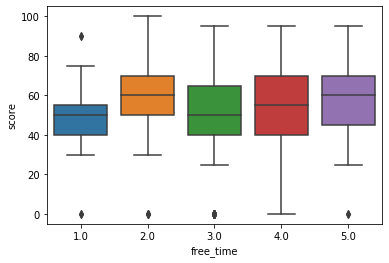

In [111]:
sns.boxplot(x=column_name, y='score', data=students)

Связь не прослеживается.

<h3>22. go_out </h3> проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [112]:
column_name = 'go_out'

In [113]:
students[column_name].value_counts()

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
Name: go_out, dtype: int64

In [114]:
number_count(students, column_name)

Всего 5 возможных значений. Больше 10 раз встречются 5 значений


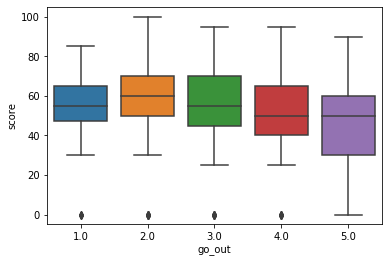

In [115]:
sns.boxplot(x=column_name, y='score', data=students)

Заметно некоторое снижение оценок при увеличении проведения времени с друзьями.

<h3>23. health </h3> текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [116]:
column_name = 'health'

In [117]:
students[column_name].value_counts()

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
Name: health, dtype: int64

In [118]:
number_count(students, column_name)

Всего 5 возможных значений. Больше 10 раз встречются 5 значений


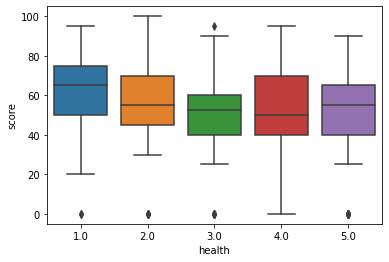

In [119]:
sns.boxplot(x=column_name, y='score', data=students)

Связь не прослеживается.

Так же на многих графиках видно, что значения "score" = 0 являются вбросами. Удаляю строки с этими оценками:

In [120]:
# функция ищет статистически значемые колонки


def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [121]:
for col in nominativ_dic.keys():
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_education
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки go_out


При удалении нулевых значений в признаке 'score' зависимости несколько изменились

In [122]:
students_for_model = students.loc[:, ['address', 'mother_education',
                           'mother_job', 'higher', 'romantic', 'go_out', 'age', 'absences', 'score']]
students_for_model.head()

,address,mother_education,mother_job,higher,romantic,go_out,age,absences,score
0,U,4.0,at_home,yes,no,4.0,18,18,30.0
1,U,1.0,at_home,yes,no,3.0,17,17,30.0
2,U,1.0,at_home,yes,NaN,2.0,15,15,50.0
3,U,4.0,health,yes,yes,2.0,15,15,75.0
4,U,3.0,other,yes,no,2.0,16,16,50.0


<h2>Рассматриваю числовые признаки:</h2>

1. <b>students.age</b> - возраст ученика (от 15 до 22)

In [28]:
students.age.value_counts()

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64

Возраст заполнен для всех студентов - пропусков нет.

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

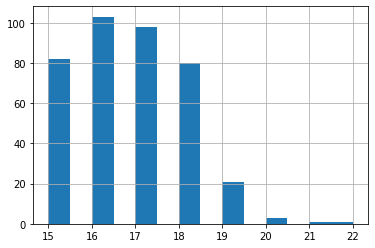

In [29]:
students.age.hist(bins=14)
students.age.describe()

In [30]:
# функция для определения межквартильного размаха и границы выбросов:
def quartil(df, column):
    median = df[column].median()  # медиана
    perc25 = df[column].quantile(0.25)  # нижний квартиль
    perc75 = df[column].quantile(0.75)  # верхний квартиль
    IQR = perc75 - perc25  # межквартильный размах
    low_border = perc25 - 1.5*IQR  # нижняя граница для определения выбросов
    high_border = perc75 + 1.5*IQR  # верхняя граница для определения выбросов
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{}, {}].".format(low_border, high_border))
    return {'median': median, 'perc25': perc25, 'perc75': perc75, 'IQR': IQR, 'low_border': low_border, 'high_border': high_border}

In [31]:
age_quartil = quartil(students, 'age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Из гистограммы видно что возраст распределен нормально. Средний возраст студентов 16.67. С возрастом количество студентов резко уменьшается.
Так же есть данные выше верхней границы выбросов.
Присваиваю отфильтрованным данным значениям граничные значения, что бы не терять данные:

In [32]:
students.age = students.age.apply(lambda x: 21 if x > 21 else x)

2. <b>students.absences</b> - количество пропущенных занятий

In [33]:
students.absences.value_counts()

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

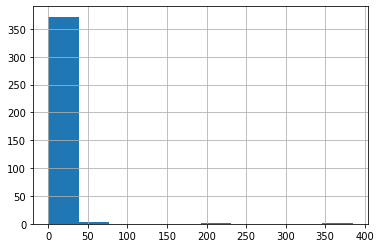

In [34]:
students.absences.hist()
students.absences.describe()

Основное распределение значений лежит от 0 до 8. Есть несколько выбросов - кто-то отсутствовал на всех занятиях. Для фильтрации выбросов воспользуюсь формулой интервартильного расстояния.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


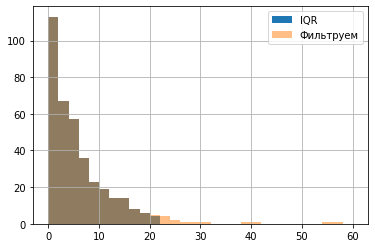

In [35]:
absences_quartil = quartil(students, 'absences')
students.absences.loc[students.absences.between(absences_quartil['low_border'], absences_quartil['high_border'])].hist(bins=30, range=(0, 60),
                                                                                                                       label='IQR')
students.absences.loc[students.absences <= 60].hist(alpha=0.5, bins=30, range=(0, 60),
                                                    label='Фильтруем')
plt.legend()

In [36]:
# считаю процента отфильтрованных записей
students.absences.loc[students.absences > 20].count() / \
    students.absences.count()

0.04497354497354497

что бы не потерять данные присваиваю отвильтрованным записям значение верхней границы:

In [37]:
students.absences = students.age.apply(lambda x: 20 if x > 20 else x)

<h2>Корреляционный анализ</h2>
Выясняю, какие столбцы коррелируют с оценкой на экзаменах.

In [38]:
students_numeric = students[['age', 'absences', 'score']].copy()

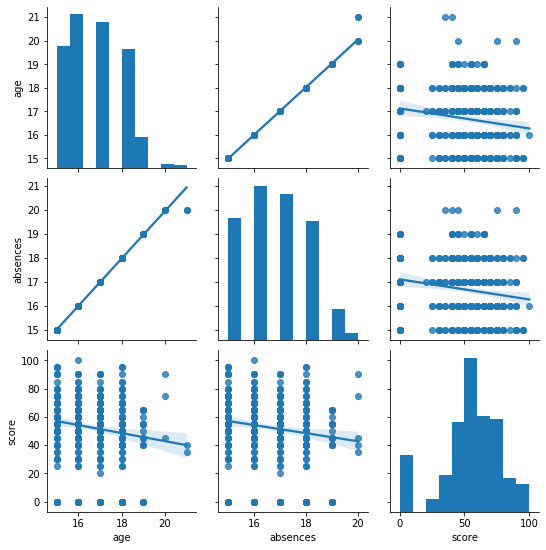

In [39]:
sns.pairplot(students_numeric, kind='reg')

In [40]:
students_numeric.corr()

,age,absences,score
age,1.000000,0.998434,-0.155852
absences,0.998434,1.000000,-0.155164
score,-0.155852,-0.155164,1.000000


Как видно из графиков признаки пропусков и возраста хорошо скоррелированны - чем старше ученик, тем больше пропускает занятий.
Так же есть небольшая зависимость между возрастом и оценками (чем старше ученик тем меньше оценки) - возможно это связано с увеличением пропущенных занятий. Ну и при увеличении пропущенных занятий так же происходит снижение баллов.

<h2>Общие выводы</h2>

1. В данных достаточно мало пустых значений и выбросов. Несколько раз встречались опечатки. Что говорит о том что данные достаточно чистые.
2. Параметры корреляция параметра absences и age сильно скоррелированны, что говорит о высокой связи между возрастом и пропущенными занятиями. Так же прослеживается небольшая отрицательная корреляция между параметрами age, absences и score. 
3. Параметр failures не несёт в себе значимой смысловой нагрузки.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'address', 'mother_education','mother_job', 'higher', 'romantic', 'go_out',  'age', 'absences', 'score'.